## Limpieza de los datos de *AirBnb*

En la [web](http://insideairbnb.com/get-the-data.html) tenemos 7 archivos diferentes sobre los establecimientos AirBnb en Madrid.  Estos archivos son:
* listings.csv.gz 
* calendar.csv.gz 
* reviews.csv.gz
* listings.csv
* reviews.csv
* neighbourhoods.csv
* neighbourhoods.geojson

Los que tienen la extensión .gz son datos sin agrupar que vienen en formato comprimido mientras que los que no la tienen son datos agregados.  Los dos últimos tienen la función de geolocalizar los apartamentos en el mapa.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [11]:
df_feb = pd.read_csv('Data/Lisboa/listings0.csv.gz',compression='gzip',low_memory=False)

In [12]:
#vemos la estructura de los datos 
df_feb.shape

(22823, 106)

In [13]:
#Todas las columnas están en minúsculas y no hay espacios
df_feb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,24056,https://www.airbnb.com/rooms/24056,20190216041211,2019-02-16,Linda-a-Velha,NaN,A comfortable apartment with pool during the s...,A comfortable apartment with pool during the s...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,NaN
1,25659,https://www.airbnb.com/rooms/25659,20190216041211,2019-02-16,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",Heart of Alfama! Center of Lisbon. Sunny Char...,Charming sunny apartment in the heart of Alfam...,Heart of Alfama! Center of Lisbon. Sunny Char...,none,Alfama is the oldest and most picturesque quar...,...,t,f,moderate,f,f,1,1,0,0,1.64
2,26993,https://www.airbnb.com/rooms/26993,20190216041211,2019-02-16,Small nice apartment in the center,NaN,"Apartment for single or couple, 5 minutes walk...","Apartment for single or couple, 5 minutes walk...",none,this is one of the best neighborhoods in Lisbo...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.06
3,28066,https://www.airbnb.com/rooms/28066,20190216041211,2019-02-16,ear the birds,NaN,traditional farm house in a quiet place where ...,traditional farm house in a quiet place where ...,none,NaN,...,f,f,flexible,f,f,1,0,1,0,NaN
4,29138,https://www.airbnb.com/rooms/29138,20190216041211,2019-02-16,Room for rent in shared house,NaN,"05 minutes from city center by subway, 10 minu...","05 minutes from city center by subway, 10 minu...",none,NaN,...,f,f,flexible,f,f,1,0,1,0,NaN


El **primer criterio** utilizado para simplificar la información contenida en la tabla es el de encontrar aquellas columnas prescindibles.

In [14]:
#Comprobamos chequeando la URL que significa cada columna y eliminamos las que son solo de consulta, 

a_borrar_consulta = ['listing_url','host_url']

#campos de texto sin relevancia, variables redundantes o URL`s que no nos sirven para el análisis. 
#Normalmente los campos de texto no vienen predeterminados por AirBnb y por tanto no tienen formato establecido.

a_borrar_texto = ['summary','space','neighborhood_overview','notes'
                     ,'transit','access','interaction','house_rules']
a_borrar_redundantes = ['scrape_id','calendar_last_scraped','jurisdiction_names','country'
                        ,'country_code','street','market']
a_borrar_urls = ['thumbnail_url','picture_url','medium_url','xl_picture_url','host_thumbnail_url','host_picture_url']

#Las siguientes columnas son eliminadas por el desconocimiento del método de cálculo o por no comprender que significan

a_borrar_desconocidas = ['is_location_exact','maximum_maximum_nights','maximum_minimum_nights','minimum_minimum_nights'
                        ,'minimum_minimum_nights','minimum_maximum_nights','is_business_travel_ready',
                         'host_verifications','host_identity_verified']
#Las siguientes hacen referencia al método de scrapping o están condicionadas por el momento concreto en el que se hizo

a_borrar_scrapping = ['maximum_nights','minimum_nights','calendar_updated','has_availability']

#Por último, estos requerimientos no son necesarios:

a_borrar_irrelevantes = ['require_guest_profile_picture','require_guest_phone_verification']

In [15]:
#Juntamos todas las columnas, las eliminamos y comprobamos cuánto se han reducido
Useless = a_borrar_texto+a_borrar_redundantes+a_borrar_urls+a_borrar_desconocidas+a_borrar_scrapping+a_borrar_irrelevantes
df_feb.drop(Useless,axis=1,inplace=True)
df_feb.shape


(22823, 71)

In [ ]:
df.loc[df.calc]

El **segundo criterio** para reducir las dimensiones es eliminar aquellas columnas que contengan al menos un 30% de nulos, ya que no serán útiles con tanta información perdida.

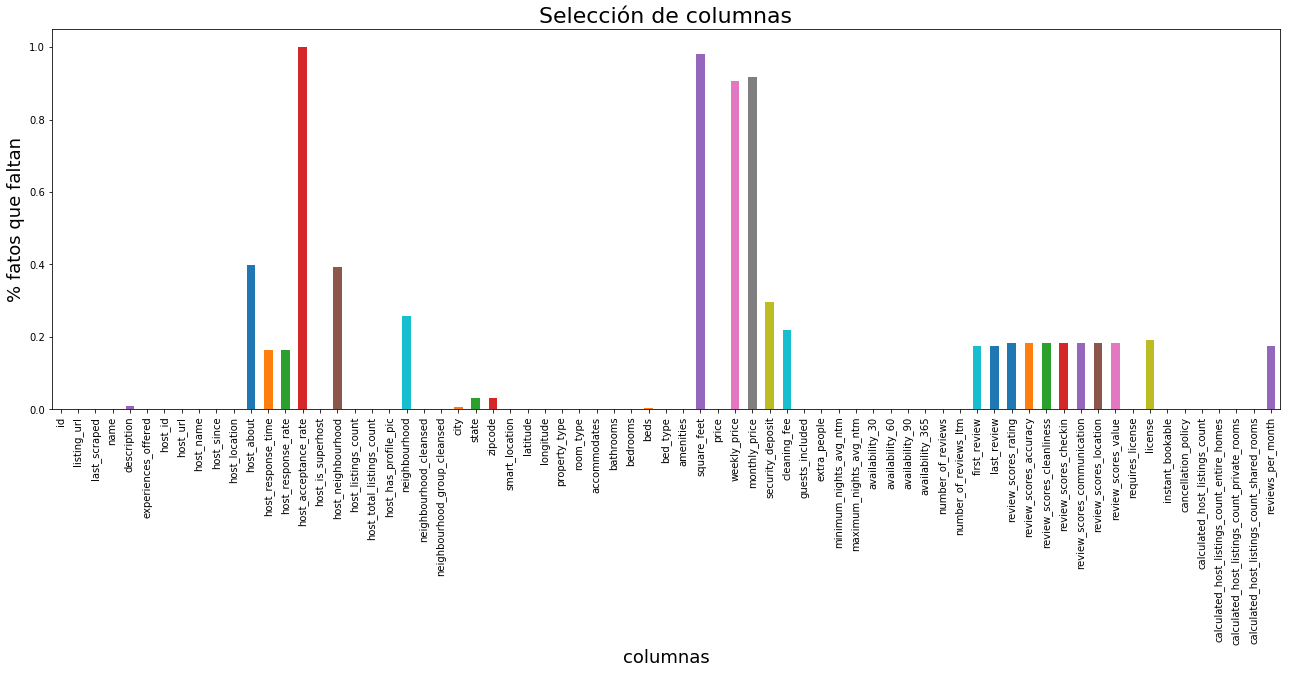

In [7]:
#Representamos gráficamente el % de nulos de las columnas restantes
missing = df_feb.isnull().sum()/df_feb.shape[0]
ax = missing.plot(kind='bar',figsize=(22,7))
ax.set_xlabel('columnas',fontsize=18)
ax.set_ylabel('% fatos que faltan',fontsize=18)
ax.set_title('Selección de columnas',fontsize=22)
plt.show()


In [ ]:
df.loc[df.calc]

In [ ]:
nulos_feb = missing.loc[missing > 0.3].index
nulos_lista_feb = list(nulos_feb)
nulos_lista_feb

In [ ]:
#Tenemos 62 columnas para realizar el análisis, pudiendo ser reducidas en el futuro en caso de ser considerado.
df_feb.drop(nulos_lista_feb, axis = 1, inplace = True)
df_feb.shape

In [ ]:
#Obtenemos el % de nulos para cada periodo en Madrid, la segunda parte de la función se utiliza
#para eliminar aquellos campos que no se usaban en el momento del scrapping.
def saca_nulos(file):
    try:
        df_month = pd.read_csv(file,compression='gzip',low_memory=False)
        global Useless
        df_month.drop(Useless,axis=1,inplace = True)
        missing = df_month.isnull().sum()/df_month.shape[0]
        nulos_month = missing.loc[missing > 0.3].index
        return list(nulos_month)
    except:
        df_month = pd.read_csv(file,compression='gzip',low_memory=False)
        global a_borrar_desconocidas
        a_borrar_desconocidas = ['is_location_exact','is_business_travel_ready',
                         'host_verifications','host_identity_verified']
        Useless = a_borrar_texto+a_borrar_redundantes+a_borrar_urls+a_borrar_desconocidas+a_borrar_scrapping+a_borrar_irrelevantes
        df_month.drop(Useless,axis=1,inplace = True)
        missing = df_month.isnull().sum()/df_month.shape[0]
        nulos_month = missing.loc[missing > 0.3].index
        return list(nulos_month)


In [ ]:
filenames = ['Data/Lisboa/listings0.csv.gz','Data/Lisboa/listings1.csv.gz',
             'Data/Lisboa/listings2.csv.gz','Data/Lisboa/listings3.csv.gz',
             'Data/Lisboa/listings4.csv.gz','Data/Lisboa/listings5.csv.gz',
             'Data/Lisboa/listings6.csv.gz','Data/Lisboa/listings7.csv.gz',
             'Data/Lisboa/listings8.csv.gz','Data/Lisboa/listings9.csv.gz']
months = ['ene','dic','oct','sep','ago','jul','may','abr','ene']


In [ ]:
lista_nulos_por_periodo = []
for f in filenames:
    a = saca_nulos(f)
    lista_nulos_por_periodo.append(a)


In [ ]:
#Comprobamos que nos devuelve una lista de listas dividida por meses
lista_nulos_por_periodo

In [ ]:
lista_nulos_por_periodo[0]

In [ ]:
#Como lo que nos interesa es borrar aquellas columnas que han sido más de un 30% nulas 
#debemos obtener los valores únicos en la lista
lista_demasiados_nulos = []
for i in range(len(filenames)):
    for x in lista_nulos_por_periodo[i]:
        if x not in lista_demasiados_nulos:
            lista_demasiados_nulos.append(x)

In [ ]:
#Estas son las columnas que borraremos de cualquier periodo a analizar(en Madrid) para que los datos sean consistentes
lista_demasiados_nulos

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df_feb.head()

In [ ]:
#Pasamos las fechas de formato texto a fecha
df_feb.last_scraped = pd.to_datetime(df_feb.last_scraped)
df_feb.host_since = pd.to_datetime(df_feb.host_since)
df_feb.first_review = pd.to_datetime(df_feb.first_review)
df_feb.last_review = pd.to_datetime(df_feb.last_review)
df_feb.last_scraped.dtype

In [ ]:
#Reemplazamos valores de la tabla por otros identificables
nulo_escondido = ['experiences_offered']

In [ ]:
df_feb.drop(nulo_escondido, axis=1,inplace=True)

In [ ]:
df_feb.shape

In [ ]:
df_feb.zipcode.value_counts(dropna = False)